# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [70]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

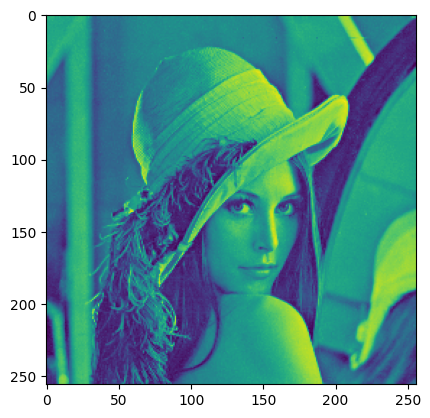

In [71]:
img = plt.imread('data/lena.png')
plt.imshow(img)
lena1 = img.copy()


**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [72]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            # write your code here
            if p[0] >= n and p[1] >= n and p[0] < img.shape[0]-n and p[1] < img.shape[1]-n: 
                neighborhood_sum = neighborhood_sum + img[(p[0]+q[0]-n), (p[1]+q[1]-n)]
            else: 
                pass
        result[p] = neighborhood_sum/ (size)**2
    # write your code here
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

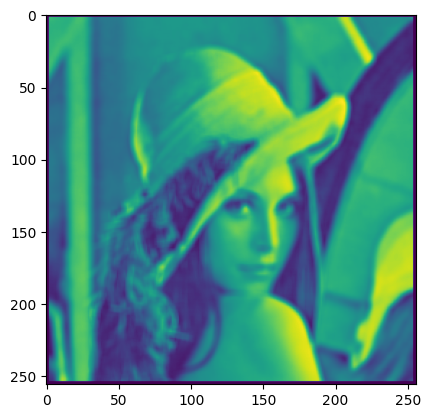

In [73]:
plt.imshow(meanfilter(lena1,5))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [74]:
mean = plt.imread('data/lena_meanfilter5.png')
numpy.allclose(mean, meanfilter(lena1,5), atol=1/255)

True

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [75]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        values_neighborhood = []
        if p[0] >= n and p[1] >= n and p[0] < img.shape[0]-n and p[1] < img.shape[1]-n: 
        
            for q in numpy.ndindex(size, size):
        
                if p[0] >= n and p[1] >= n and p[0] < img.shape[0]-n and p[1] < img.shape[1]-n: 
                    values_neighborhood.append(img[(p[0]+q[0]-n), (p[1]+q[1]-n)])
                    values_neighborhood.sort()
        
            result[p] = values_neighborhood[(size**2)// 2] 
    # write your code here
    return result
  

In [76]:
data = [4, 3, 8, 2]
data.sort()
print(len(data))
print(data)
data.append(2)
print(data)


4
[2, 3, 4, 8]
[2, 3, 4, 8, 2]


**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

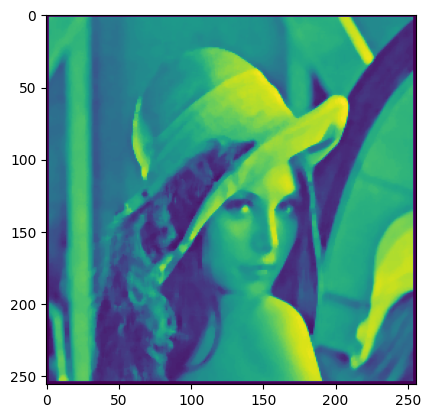

In [77]:
plt.imshow(medianfilter(lena1,5))

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [78]:
median = plt.imread('data/lena_medianfilter5.png')
lena2 = img.copy()
numpy.allclose(median, medianfilter(lena2,5), atol=1/255)

True

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [79]:
import scipy.ndimage
lena3 = img.copy()

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

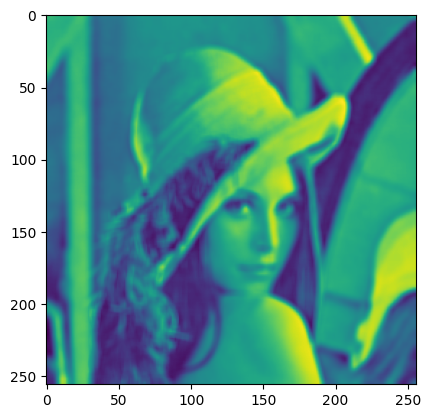

In [80]:
scipy.ndimage.uniform_filter(lena3, 5)
plt.imshow(scipy.ndimage.uniform_filter(lena3, 5))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

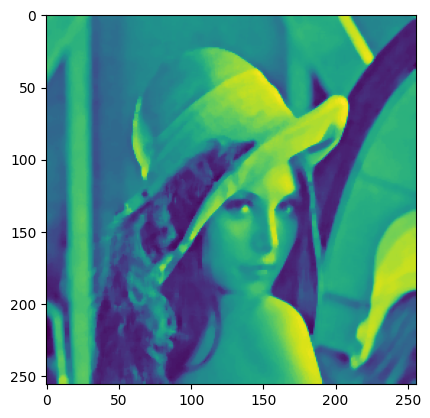

In [81]:
lena4 = img.copy()
plt.imshow(scipy.ndimage.median_filter(lena4, 5))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

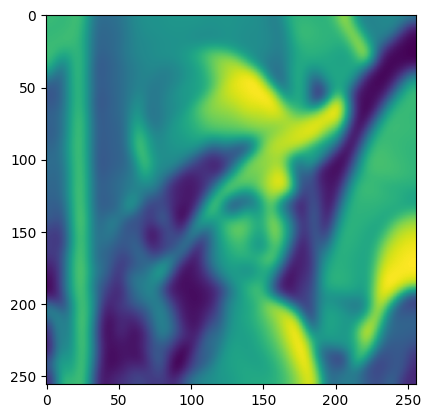

In [82]:
lena5 = img.copy()
plt.imshow(scipy.ndimage.gaussian_filter(lena5, 5))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

In [83]:
numpy.allclose(scipy.ndimage.median_filter(lena4, 5), medianfilter(lena4,5), atol=1/255)
#plt.imshow(medianfilter(lena4, 5))

False

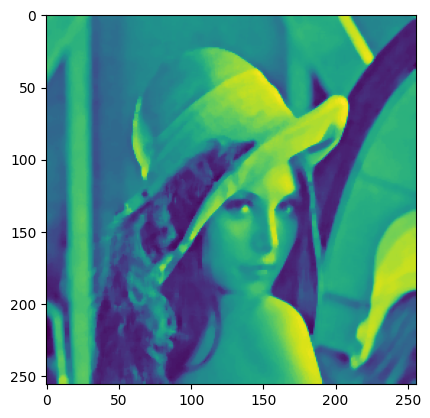

In [84]:
plt.imshow(scipy.ndimage.median_filter(lena4, 5))

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [116]:
def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0 
        if p[0] >= n and p[1] >= n and p[0] < img.shape[0]-n and p[1] < img.shape[1]-n:
            neighborhood_sum = img[(p[0] - n): (p[0] + (n+1)), (p[1] - n): (p[1] + (n+1))]
            result[p] = neighborhood_sum.mean()
    return result



**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

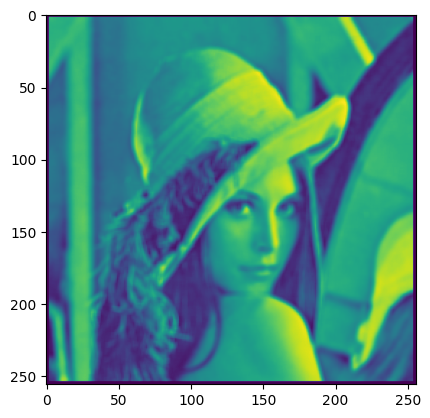

In [109]:
plt.imshow(fastfilter(lena4, 5))

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

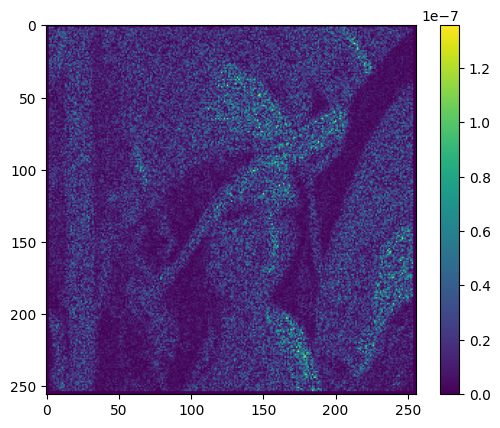

In [119]:
#plt.imshow(meanfilter(lena4, 5))
diff = numpy.abs(meanfilter(lena4, 5) - fastfilter(lena4, 5))
plt.imshow(diff)
plt.colorbar()

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [120]:
%timeit fastfilter(lena4, 5)

870 ms ± 82.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [121]:
%timeit meanfilter(lena4, 5)

6.47 s ± 295 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

Application of manual meanfilter is significantly slower as it has to jump from one loop to the next. 
That continuos running through the second loop is the reason for the longer runtime.